<strong><b><font size="6">NLP_preprocessing_Lab2 ( Continuation )</font></b></strong>


<strong><b><font size="4">Done by:<br>ELGHABI Taha<br> ELBATOURI Badr-EDDINE</font></b></strong>

<h1>To do tasks <span class="tocSkip"></span></h1>
    <li> Lower casing
    <li> Punctuation removal
    <li> Identifying and Remove Stop Words
    <li> Tokenize Text in Words
    <li> NLTK Word Stemming
    <li> Build a bag-of-words
    <li> Create Term Frequency-Inverse Document Frequency (TF-IDF)
  

## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import string
import re
import numpy as np

#nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import tokenize

#sci-kit learn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


## Download and Inspect the IMDB Movie Reviews Dataset
- Labeled movie reviews data as either positive or negative reviews
- We can download the __movie_reviews__ package using the nltk.download function:

In [2]:
nltk.download("movie_reviews")

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\tahae\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [3]:
from nltk.corpus import movie_reviews

In [4]:
len(movie_reviews.fileids())

2000

In [5]:
movie_reviews.fileids()[:5]

['neg/cv000_29416.txt',
 'neg/cv001_19502.txt',
 'neg/cv002_17424.txt',
 'neg/cv003_12683.txt',
 'neg/cv004_12641.txt']

In [6]:
movie_reviews.fileids()[-5:]

['pos/cv995_21821.txt',
 'pos/cv996_11592.txt',
 'pos/cv997_5046.txt',
 'pos/cv998_14111.txt',
 'pos/cv999_13106.txt']

- __fileids__ can also filter the available files based on their category, which is the name of the subfolders they are located in. Therefore we can have lists of positive and negative reviews separately.

In [7]:
negative_fileids = movie_reviews.fileids('neg')
positive_fileids = movie_reviews.fileids('pos')

In [8]:
len(negative_fileids), len(positive_fileids)

(1000, 1000)

- We can inspect one of the reviews using the raw method of movie_reviews, each file is split into sentences, the curators of this dataset also removed from each review from any direct mention of the rating of the movie.

In [9]:
print(movie_reviews.raw(fileids=positive_fileids[20]))

by phil curtolo mel gibson ( braveheart ) gave a gripping performance as the father of a young kidnapped boy in ron howard's ransom . 
gibson plays tom mullen , a wealthy business tycoon whose past actions are coming back to haunt him as a deranged psychopath , played by gary sinise ( forrest gump ) , and his band of low-life thugs kidnap his only son for $2 million . 
tom and his wife , kate , played by rene russo ( tin cup ) were instructed not to inform the police , but they contacted the fbi . 
minutes later , an elite team of agents led by delroy lindo ( broken arrow ) are in tom's house and wiring every phone . 
the plot sounds average , just like most other kidnap movies that you've already seen , and it was nothing more than that . 
that is until about half-way through the movie . 
suddenly , tom goes to the fox 5 news room and makes a live broadcast saying , " this is your ransom . 
but this is as close as you will ever get to it . 
instead , i am offering this money as a rewa

In [10]:
negative_fileids[2]

'neg/cv002_17424.txt'

In [11]:
negative_features = pd.DataFrame(
    {'review':movie_reviews.raw(fileids=[f]),'label': 'neg'} for f in negative_fileids
)

In [12]:
positive_features = pd.DataFrame(
    {'review':movie_reviews.raw(fileids=[f]),'label': 'pos'} for f in positive_fileids
)

In [13]:
data = pd.concat([positive_features, negative_features], ignore_index=True)


In [14]:
data

,review,label
0,films adapted from comic books have had plenty...,pos
1,every now and then a movie comes along from a ...,pos
2,you've got mail works alot better than it dese...,pos
3,""" jaws "" is a rare film that grabs your atten...",pos
4,moviemaking is a lot like being the general ma...,pos
...,...,...
1995,"if anything , "" stigmata "" should be taken as ...",neg
1996,"john boorman's "" zardoz "" is a goofy cinematic...",neg
1997,the kids in the hall are an acquired taste . \...,neg
1998,there was a time when john carpenter was a gre...,neg


## expand_contractions

In [15]:
contractions_dict = {"ain't": "are not","'s":" is","aren't": "are not"}
# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)
# Expanding Contractions in the reviews
data['review']=data['review'].apply(lambda x:expand_contractions(x))

### Lower casing

In [16]:
data['review'][0][:590]

"films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there is never really been a comic book like from hell before . \nfor starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid '80s with a 12-part series called the watchmen . \nto say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd"

In [17]:
data['review'] = data['review'].str.lower()

In [18]:
data['review'][0][:590]

"films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there is never really been a comic book like from hell before . \nfor starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid '80s with a 12-part series called the watchmen . \nto say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd"

### Remove punctuation

In [19]:
data.review[2]

"you've got mail works alot better than it deserves to . \nin order to make the film a success , all they had to do was cast two extremely popular and attractive stars , have them share the screen for about two hours and then collect the profits . \nno real acting was involved and there is not an original or inventive bone in it is body ( it is basically a complete re-shoot of the shop around the corner , only adding a few modern twists ) . \nessentially , it goes against and defies all concepts of good contemporary filmmaking . \nit is overly sentimental and at times terribly mushy , not to mention very manipulative . \nbut oh , how enjoyable that manipulation is . \nbut there must be something other than the casting and manipulation that makes the movie work as well as it does , because i absolutely hated the previous ryan/hanks teaming , sleepless in seattle . \nit couldn't have been the directing , because both films were helmed by the same woman . \ni haven't quite yet figured out

In [20]:
punctuations = string.punctuation
punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
#data["review"].apply(lambda x: x.replace(punctuations, ''))
data['review'] = data['review'].apply(lambda x: re.sub('[%s]' % re.escape(punctuations), '' , x))

In [22]:
#verification
data.review[2]

'youve got mail works alot better than it deserves to  \nin order to make the film a success  all they had to do was cast two extremely popular and attractive stars  have them share the screen for about two hours and then collect the profits  \nno real acting was involved and there is not an original or inventive bone in it is body  it is basically a complete reshoot of the shop around the corner  only adding a few modern twists   \nessentially  it goes against and defies all concepts of good contemporary filmmaking  \nit is overly sentimental and at times terribly mushy  not to mention very manipulative  \nbut oh  how enjoyable that manipulation is  \nbut there must be something other than the casting and manipulation that makes the movie work as well as it does  because i absolutely hated the previous ryanhanks teaming  sleepless in seattle  \nit couldnt have been the directing  because both films were helmed by the same woman  \ni havent quite yet figured out what i liked so much ab

### Identifying and Remove Stop Words
- A stop word is a commonly used word (such as “the”, “a”, “an”, “in”). 
- Removal of stopwords is necessary since they add noise without having any informational value in modeling.

In [23]:
data['review'] = data['review'].apply(lambda x: re.sub('a{2,9}h{1,5}', '' , x))

__Download and check stopwords from nltk:__

In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tahae\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
stop = set(stopwords.words('english'))

In [26]:
print('Total stop words:',len(stop))

Total stop words: 179


__Removing stopwords from reviews:__

In [27]:
stop.add('\n')
stop.add('http')
stop.add('aa')
stop.add('aaa')

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop])
#here we have implemented a custom function that will split each word from the text and check whether it is a stopword or not.
#If not then pass as it is in string and if stopword then removes it.
data['review'] = data['review'].apply(lambda x: remove_stopwords(x))


In [28]:
#verification
data.review[2]

'youve got mail works alot better deserves order make film success cast two extremely popular attractive stars share screen two hours collect profits real acting involved original inventive bone body basically complete reshoot shop around corner adding modern twists essentially goes defies concepts good contemporary filmmaking overly sentimental times terribly mushy mention manipulative oh enjoyable manipulation must something casting manipulation makes movie work well absolutely hated previous ryanhanks teaming sleepless seattle couldnt directing films helmed woman havent quite yet figured liked much youve got mail really important like something much even question storyline cliched come tom hanks plays joe fox insanely likeable owner discount book chain meg ryan plays kathleen kelley even insanely likeable proprietor familyrun children book shop called nice homage shop around corner fox kelley soon become bitter rivals new fox books store opening right across block small business lit

__Removing digits__

In [29]:
#remove words and digits
data['review'] = data['review'].apply(lambda x: re.sub(r'\b[0-9]+', '',x))

### Tokenize Text in Words
- Tokenizing text is important since text can’t be processed without tokenization. Tokenization process means splitting bigger parts to small parts.
- You can tokenize paragraphs to sentences and tokenize sentences to words according to your needs. 
- NLTK is shipped with sentence tokenizer and word tokenizer.
- Non english text can also be tokenized by specifying the language

In [30]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tahae\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

__Word Tokenizing:__

In [31]:
data['review']=data['review'].apply(lambda x: nltk.word_tokenize(x))

In [32]:
data.review[0]

['films',
 'adapted',
 'comic',
 'books',
 'plenty',
 'success',
 'whether',
 'theyre',
 'superheroes',
 'batman',
 'superman',
 'spawn',
 'geared',
 'toward',
 'kids',
 'casper',
 'arthouse',
 'crowd',
 'ghost',
 'world',
 'never',
 'really',
 'comic',
 'book',
 'like',
 'hell',
 'starters',
 'created',
 'alan',
 'moore',
 'eddie',
 'campbell',
 'brought',
 'medium',
 'whole',
 'new',
 'level',
 'mid',
 's',
 'part',
 'series',
 'called',
 'watchmen',
 'say',
 'moore',
 'campbell',
 'thoroughly',
 'researched',
 'subject',
 'jack',
 'ripper',
 'would',
 'like',
 'saying',
 'michael',
 'jackson',
 'starting',
 'look',
 'little',
 'odd',
 'book',
 'graphic',
 'novel',
 'pages',
 'long',
 'includes',
 'nearly',
 'consist',
 'nothing',
 'footnotes',
 'words',
 'dont',
 'dismiss',
 'film',
 'source',
 'get',
 'past',
 'whole',
 'comic',
 'book',
 'thing',
 'might',
 'find',
 'another',
 'stumbling',
 'block',
 'hell',
 'directors',
 'albert',
 'allen',
 'hughes',
 'getting',
 'hughes',
 'b

### NLTK Word Stemming
- Word stemming means removing affixes from words and return the root word. Ex: The stem of the word working => work.
- Search engines use this technique when indexing pages, so many people write different versions for the same word and all of them are stemmed to the root word.
- There are many algorithms for stemming, but the most used algorithm is Porter stemming algorithm.
- NLTK has a class called PorterStemmer which uses Porter stemming algorithm.

In [33]:
#stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):
    return ([stemmer.stem(word) for word in text])
data["review"] = data["review"].apply(lambda x: stem_words(x))

### Lemmatizing Words Using [WordNet](https://wordnet.princeton.edu/)

__Wordnet:__
- WordNet is a lexical database for the English language.
- It groups English words into sets of synonyms called synsets, provides short definitions and usage examples, and records a number of relations among these synonym sets or their members. 
- WordNet can thus be seen as a combination of dictionary and thesaurus. While it is accessible to human users via a web browser, its primary use is in automatic text analysis and artificial intelligence applications.

__Lemmatization:__
- Lemmatization is a more effective option than stemming because it converts the word into its root word, rather than just stripping the suffices. 
- It makes use of the vocabulary and does a morphological analysis to obtain the root word. Therefore, we usually prefer using lemmatization over stemming.
- Example: reduce words such as “am”, “are”, and “is” to a common form such as “be”

In [34]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tahae\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [35]:
#Lemmatizing 
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text])
data["review"] = data["review"].apply(lambda text: lemmatize_words(text))

__Bag of Words using CountVectorizer:__


In [36]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
corpus=data["review"]
count_vector = CountVectorizer() 

In [37]:
vect = count_vector.fit_transform(corpus).toarray()
vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [38]:
word_count = count_vector.get_feature_names()
print(word_count)

['aaliyah', 'aalyah', 'aameet', 'aamir', 'aardman', 'aaron', 'aatish', 'ab', 'aback', 'abandon', 'abat', 'abb', 'abba', 'abber', 'abberlin', 'abbi', 'abbot', 'abbott', 'abbrevi', 'abc', 'abdomen', 'abduct', 'abducte', 'abduljabbar', 'abe', 'abel', 'aberdeen', 'aberr', 'abet', 'abey', 'abhorr', 'abid', 'abigail', 'abiil', 'abil', 'abject', 'abl', 'ablaz', 'abli', 'abnorm', 'aboard', 'abod', 'abolish', 'abolitionist', 'abomb', 'abomin', 'aborb', 'aborgin', 'aborigin', 'abort', 'abortionist', 'aboslut', 'abound', 'about', 'aboutfac', 'aboutth', 'aboveaverag', 'aboveground', 'abovement', 'abovepar', 'abovethetitl', 'abrad', 'abraham', 'abram', 'abras', 'abreast', 'abril', 'abroad', 'abrupt', 'abruptli', 'abscond', 'absenc', 'absens', 'absent', 'absente', 'absentmind', 'absentminded', 'absinth', 'absolout', 'absoltu', 'absolut', 'absolutist', 'absolv', 'absorb', 'absorpt', 'abstin', 'abstract', 'absurd', 'absurdist', 'absurdli', 'abu', 'abund', 'abundantli', 'abus', 'abuzz', 'abysm', 'abyss

### Term Frequency and Inverse Document Frequency
- Term Frequency measures how frequently a term occurs in a document.
- Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization: 

        TF(t) = (Number of times term t appears in a document)

- Inverse Document Frequency measures how important a term is. While computing TF, all terms are considered equally important. 
- However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 

        IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

In [39]:
vectorizer = CountVectorizer(analyzer = 'word',
                            tokenizer = None,
                            preprocessor = None,
                            stop_words = None,
                            max_features = 10,
                            ngram_range=(1,2),
                            #binary=True,
                            min_df=0.1)
vectorizer_features = vectorizer.fit_transform(data['review'])

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [41]:
print('Tfidf ponderations')


# Initialize the "TfidfVectorizer" object.
tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(data['review'])

# Numpy arrays are easy to work with, so convert the result to an array
vectorizer_features = X_tfidf.toarray()
tfidf_frequency_matrix = pd.DataFrame(vectorizer_features,columns=tfidf_vect.get_feature_names())
tfidf_frequency_matrix

Tfidf ponderations


,aaliyah,aalyah,aameet,aamir,aardman,aaron,aatish,ab,aback,abandon,...,zuehlk,zuko,zukovski,zulu,zundel,zurg,zweibel,zwick,zwigoff,zyci
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
data

,review,label
0,film adapt comic book plenti success whether t...,pos
1,everi movi come along suspect studio everi ind...,pos
2,youv got mail work alot better deserv order ma...,pos
3,jaw rare film grab attent show singl imag scre...,pos
4,moviemak lot like gener manag nfl team postsal...,pos
...,...,...
1995,anyth stigma taken warn releas similarlythem f...,neg
1996,john boorman zardoz goofi cinemat debacl funda...,neg
1997,kid hall acquir tast took least season watch s...,neg
1998,time john carpent great horror director cours ...,neg


In [43]:
#frequency distribution of the class attribute
print(data['label'].value_counts())

pos    1000
neg    1000
Name: label, dtype: int64


In [44]:
#** DECOUPAGE EN TRAIN ET TEST ***
from sklearn.model_selection import train_test_split
train, test = train_test_split(data,train_size=0.8,random_state=1,stratify=data['label'])

In [45]:
train.shape

(1600, 2)

In [46]:
train.label.value_counts()

neg    800
pos    800
Name: label, dtype: int64

# Generate the document term matrix - train set

In [47]:
#*** Generate the document term matrix - train set ***

#import the CountVectorizer tool
from sklearn.feature_extraction.text import CountVectorizer

#instantiation of the objet
parseur = CountVectorizer(binary=True)

#create the document term matrix
XTrain = parseur.fit_transform(train['review'])

In [48]:
XTrain

<1600x28155 sparse matrix of type '<class 'numpy.int64'>'
	with 401112 stored elements in Compressed Sparse Row format>

In [49]:
#list of tokens
print(parseur.get_feature_names())

['aaliyah', 'aalyah', 'aameet', 'aamir', 'aardman', 'aaron', 'aatish', 'ab', 'aback', 'abandon', 'abat', 'abb', 'abba', 'abber', 'abberlin', 'abbi', 'abbot', 'abbott', 'abc', 'abdomen', 'abduct', 'abduljabbar', 'abe', 'abel', 'aberdeen', 'aberr', 'abet', 'abey', 'abhorr', 'abid', 'abigail', 'abiil', 'abil', 'abject', 'abl', 'ablaz', 'abli', 'abnorm', 'aboard', 'abod', 'abolish', 'abolitionist', 'abomb', 'abomin', 'aborb', 'aborgin', 'aborigin', 'abort', 'abortionist', 'aboslut', 'abound', 'about', 'aboutfac', 'aboutth', 'aboveaverag', 'aboveground', 'abovement', 'abovepar', 'abovethetitl', 'abrad', 'abraham', 'abram', 'abras', 'abreast', 'abril', 'abroad', 'abrupt', 'abruptli', 'absenc', 'absens', 'absent', 'absente', 'absentmind', 'absentminded', 'absinth', 'absolout', 'absoltu', 'absolut', 'absolutist', 'absolv', 'absorb', 'absorpt', 'abstin', 'abstract', 'absurd', 'absurdist', 'absurdli', 'abund', 'abundantli', 'abus', 'abuzz', 'abysm', 'abyss', 'abyssinian', 'ac3', 'academ', 'acade

In [50]:
#number of  tokens
print(len(parseur.get_feature_names()))

28155


In [51]:
#transform the sparse matrix into a numpy matrix
mdtTrain = XTrain.toarray()

#type of the matrix
print(type(mdtTrain))

#size of the matrix
print(mdtTrain.shape)

<class 'numpy.ndarray'>
(1600, 28155)


In [52]:
mdtTrain

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [53]:
#frequency of the terms
freq_mots = np.sum(mdtTrain,axis=0)#sum since we are using binary ponderation
print(freq_mots)
print('****')
#argmax
index = np.argsort(freq_mots)
print(index)
print('****')
#print the terms and their frequency
imp = {'terme':np.asarray(parseur.get_feature_names())[index],'freq':freq_mots[index]}
print(pd.DataFrame(imp).sort_values(by='freq', ascending=False))

[3 1 1 ... 6 1 1]
****
[28154 21142 21139 ... 15974 17250  8435]
****
             terme  freq
28154         film  1437
28153          one  1406
28152         movi  1307
28151         like  1216
28150         make  1141
...            ...   ...
8516      concerto     1
8515      tomahawk     1
8514        tomboy     1
8513   conceptwhat     1
0             zyci     1

[28155 rows x 2 columns]


## Dimensionnality Reduction  1 – Termes frequency

In [54]:
#***** MIN FREQUENCY

#rebuild the parser with new options : min_df = 10
parseurBis = CountVectorizer(stop_words='english',binary=True, min_df = 10)
XTrainBis = parseurBis.fit_transform(train['review'])

#number of tokens
print(len(parseurBis.get_feature_names()))

#mdt_bis
mdtTrainBis = XTrainBis.toarray()

5228


## train the classifier

### KNN classifier

In [55]:
#import the class KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#instatiate the object
knn_classifier = KNeighborsClassifier(n_neighbors=2)

#perform the training process
knn_classifier.fit(mdtTrainBis,train['label'])

# Import confusion_matrix and classification_report from sklearn's metrics module
from sklearn.metrics import confusion_matrix, classification_report

# Import precision_score, recall_score and f1_score from sklearn's metrics module
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Import plot_roc_curve from sklearn's metrics module
from sklearn.metrics import plot_roc_curve


In [56]:
#generate the document term matrix for the test set
#using the object learned from the train set
#import the metrics class for the performance measurement
from sklearn import metrics

#create the document term matrix
mdtTestBis = parseurBis.transform(test['review'])

#prediction for the test set
predTestBis = knn_classifier.predict(mdtTestBis)



In [57]:
# Create a confusion matrix using the confusion_matrix function

cf_matrix = confusion_matrix(test['label'], predTestBis)

<AxesSubplot:>

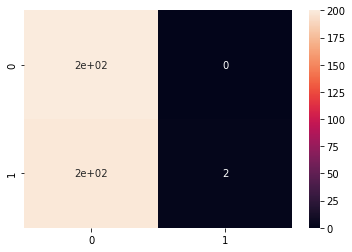

In [58]:
# Create a more visual confusion matrix
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [59]:
# Create a classification report using the classification_report function
from sklearn.metrics import classification_report

print(classification_report(test['label'], predTestBis))


              precision    recall  f1-score   support

         neg       0.50      1.00      0.67       200
         pos       1.00      0.01      0.02       200

    accuracy                           0.51       400
   macro avg       0.75      0.51      0.34       400
weighted avg       0.75      0.51      0.34       400



In [60]:
# Find the precision score of the model using precision_score()
print("the precision score: ")
precision_score(test['label'], predTestBis,pos_label='pos')

the precision score: 


1.0

In [61]:
# Find the recall score
print("the recall score: ")
recall_score(test['label'], predTestBis,pos_label='pos')

the recall score: 


0.01

In [62]:
# Find the F1 score
print("the F1 score: ")
f1_score(test['label'], predTestBis,pos_label='pos')

the F1 score: 


0.019801980198019802

In [63]:
# Acuuracy rate
print("the Acuuracy rate: ")
accuracy_score(test['label'], predTestBis)

the Acuuracy rate: 


0.505

In [64]:
#*** train the classifier

#import the class LogistiRegression
from sklearn.linear_model import LogisticRegression

#instatiate the object
modelBis = LogisticRegression()

#perform the training process
modelBis.fit(mdtTrainBis,train['label'])

#create the document term matrix for test
mdtTestBis = parseurBis.transform(test['review'])

#prediction for the test set
predTestBis = modelBis.predict(mdtTestBis)

In [65]:
# Create a confusion matrix using the confusion_matrix function

cf_matrix = confusion_matrix(test['label'], predTestBis)

<AxesSubplot:>

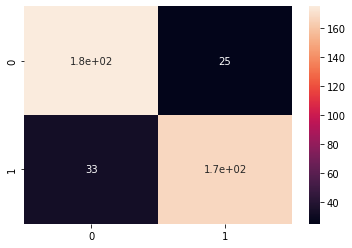

In [66]:
# Create a more visual confusion matrix
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [67]:
# Create a classification report using the classification_report function
from sklearn.metrics import classification_report

print(classification_report(test['label'], predTestBis))


              precision    recall  f1-score   support

         neg       0.84      0.88      0.86       200
         pos       0.87      0.83      0.85       200

    accuracy                           0.85       400
   macro avg       0.86      0.85      0.85       400
weighted avg       0.86      0.85      0.85       400



In [68]:
# Find the precision score of the model using precision_score()
print("the precision score: ")
precision_score(test['label'], predTestBis,pos_label='pos')

the precision score: 


0.8697916666666666

In [69]:
# Find the recall score
print("the recall score: ")
recall_score(test['label'], predTestBis,pos_label='pos')

the recall score: 


0.835

In [70]:
# Find the F1 score
print("the F1 score: ")
f1_score(test['label'], predTestBis,pos_label='pos')

the F1 score: 


0.8520408163265306

In [71]:
# Acuuracy rate
print("the Acuuracy rate: ")
accuracy_score(test['label'], predTestBis)

the Acuuracy rate: 


0.855

## Dimensionality reduction 2 – Model post-processing

In [72]:
modelBis.coef_

array([[ 0.01539474, -0.03757492, -0.21860081, ..., -0.06530997,
        -0.15287261,  0.04581168]])

In [73]:
#absolute  value of the coefficients
coef_abs = np.abs(modelBis.coef_[0,:])

coef_abs

array([0.01539474, 0.03757492, 0.21860081, ..., 0.06530997, 0.15287261,
       0.04581168])

In [74]:
#percentiles of the coefficients (absolute value)
thresholds = np.percentile(coef_abs,[0,25,50,75,90,100])
print(thresholds)

[2.81407955e-06 3.53489962e-02 7.62932606e-02 1.38446348e-01
 2.19588626e-01 1.01704776e+00]


In [75]:
#identify the coefficients "significantly higher than zero
#use 1st quartile as threshold
indices = np.where(coef_abs > thresholds[2])
print(len(indices[0]))

2614


In [76]:
#create the new document term matrices

#document term matrices - train and test sets
mdtTrainTer = mdtTrainBis[:,indices[0]]#toutes les lignes et uniquement les colones 
mdtTestTer = mdtTestBis[:,indices[0]]

#checking
print(mdtTrainTer.shape)
print(mdtTestTer.shape)

(1600, 2614)
(400, 2614)


In [77]:
#instatiate the object
modelTer = LogisticRegression()

#train a new classifier with selected terms
modelTer.fit(mdtTrainTer,train['label'])

#prediction on the test set
predTestTer = modelTer.predict(mdtTestTer)

#confusion matrix
mcTestTer = metrics.confusion_matrix(test['label'],predTestTer)
print(mcTestTer)

[[171  29]
 [ 34 166]]


In [78]:
#selected terms
sel_terms = np.array(parseurBis.get_feature_names())[indices[0]]

#sorted indices of the absolute value coefficients
sorted_indices = np.argsort(np.abs(modelTer.coef_[0,:]))

#print the terms and theirs coefficients
imp = {'term':np.asarray(sel_terms)[sorted_indices],'coef':modelTer.coef_[0,:][sorted_indices]}
#The 10 most discriminating terms in the model are (with the associated coefficients):
print(pd.DataFrame(imp).sort_values(by='coef', ascending=False).head(10))

         term      coef
2608  surpris  0.733821
2607    thank  0.727349
2604   hilari  0.703521
2600      fun  0.653152
2599    enjoy  0.648446
2597  sometim  0.631855
2594     town  0.617782
2593     flaw  0.616638
2592    great  0.613729
2589    excel  0.602024


The coefficients of these terms being positive, all contribute to the designation of “pos” ie. when they are present in the documents, the chances of having a positive review increase.

The detailed analysis of the results begins at this stage. It is likely to be expected that the dictionary will have to be refined to improve the relevance of the device.

## Deployement

One of the purposes of text categorization is to produce a function that automatically assigns a class (“pos” or “neg”) to a new document.

In this section, we detail the different steps of the operations to show that the task is far from trivial.

We want to classify the sentence “the last half of the film is very well done” using our
third model modelTer knowing that the selection of variables made will complicate things a little.

Description compatible with the matrix documents terms. We transform the document into a vector of presence absence of the terms present in the dictionary:

In [79]:
#document to classify
doc = ['the last half of the film is very well done']

#document preprocessing
doc=expand_contractions(str(doc))
doc = str(doc).lower()
doc = re.sub('[%s]' % re.escape(string.punctuation), '' , str(doc))
doc = re.sub('[%s]' % re.escape(string.punctuation), '' ,  str(doc))
doc =re.sub(r'\b[0-9]+\b\s*', '', str(doc))
doc = remove_stopwords(str(doc))

#get its description
desc = parseurBis.transform([doc])
print(desc)

  (0, 1716)	1
  (0, 2053)	1


In [80]:
doc = ["It was a very bad film with awful acting."]
#document preprocessing
doc=expand_contractions(str(doc))
doc = str(doc).lower()
doc = re.sub('[%s]' % re.escape(string.punctuation), '' , str(doc))
doc =re.sub(r'\b[0-9]+\b\s*', '', str(doc))
doc = remove_stopwords(str(doc))

#get its description
desc = parseurBis.transform([doc])
print(desc)

  (0, 320)	1
  (0, 1716)	1


In [81]:
#which terms
print(np.asarray(parseurBis.get_feature_names())[desc.indices])

['bad' 'film']


In [82]:
#dense representation
dense_desc = desc.toarray()

#apply var. selection
dense_sel = dense_desc[:,indices[0]]

In [83]:
dense_desc 

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [84]:
#prediction of the class membership
pred_doc = modelTer.predict(dense_sel)
print(pred_doc)

['neg']


In [85]:
#prediction of the class membership probabilities
pred_proba = modelTer.predict_proba(dense_sel)
print(pred_proba)

[[0.86536636 0.13463364]]


The sentence: " "It was a very bad film with awful acting." " was classified as negative which is actually the case.